Let's begin by brainstorming a few questions to answer with this data set.

1. What factors made people more likely to survive?
2. What were the demographics of each ticket class?
3. Were children more likely to survive if they traveled with a parent, a nanny, or both?
4. Graph the ticket price vs. survival rate
5. Graph family members vs. survival rate
6. Chivalry...did women and children survive more?

I find the first question to be the most interesting, and we will probably answer many of the other questions while investigating that one.

In [35]:
#parse csv and investigate csv

import pandas as pd

filename = '/Users/Arvi/Desktop/Data_Analyst/Investigate_A_Data_Set/Project/titanic-data.csv'

titanic_df = pd.read_csv(filename)
print(titanic_df.head())
print(len(titanic_df))

#get basic information about csv info
print(titanic_df.describe())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
89

In [37]:
#averages for survivors vs. non-survivors

survivor_groupings = titanic_df.groupby('Survived', as_index=False)

print(survivor_groupings.mean())



   Survived  PassengerId    Pclass        Age     SibSp     Parch       Fare
0         0   447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1         1   444.368421  1.950292  28.343690  0.473684  0.464912  48.395408


Taking the means of the numerical data gave some interesting information. Survivors were on average in a ticket class and paid more than double the fare as non-survivors. This leads me to believe that wealth was a good determiner of whether one survived or not.

In [42]:
#Were men or women more likely to survive?

gender_groups = titanic_df.groupby('Sex')

print(gender_groups['Survived'].mean())

gender_survived_groups = titanic_df.groupby(['Sex', 'Survived'])

print(gender_survived_groups.mean())

gender_survived_groups.apply(len)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
                 PassengerId    Pclass        Age     SibSp     Parch  \
Sex    Survived                                                         
female 0          434.851852  2.851852  25.046875  1.209877  1.037037   
       1          429.699571  1.918455  28.847716  0.515021  0.515021   
male   0          449.121795  2.476496  31.618056  0.440171  0.207265   
       1          475.724771  2.018349  27.276022  0.385321  0.357798   

                      Fare  
Sex    Survived             
female 0         23.024385  
       1         51.938573  
male   0         21.960993  
       1         40.821484  


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

It appears that the average female survivor was older than non-survivors. Opposite was true for males. Could this be that younger men were more athletic, but older women were given priority to life boats?

Earlier, it was shown that wealth and class was a good determiner on survival rates, however, men and women survival rates among fare and class were similar, so gender was very likely a determiner of survival. 

In [40]:
#Which port was more likely to survive?

port_groups = titanic_df.groupby('Embarked')

print(port_groups['Survived'].mean())

port_survived_groups = titanic_df.groupby(['Embarked', 'Survived'])

port_survived_groups.mean()
port_survived_groups.apply(len)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In contrast to gender, it appears that Cherbourgian survivors paid higher fares than Queenstown and Southampton passengers. This could be the reason they have higher survival rates. 

Populating the interactive namespace from numpy and matplotlib


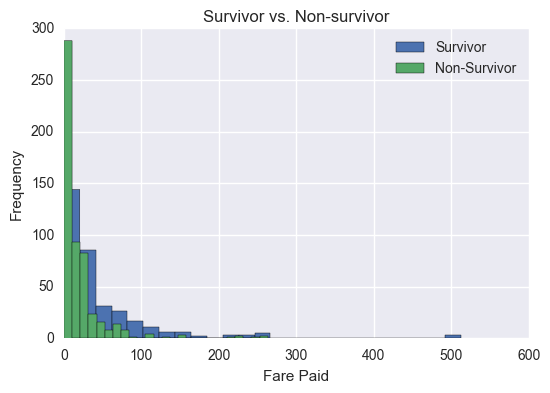

In [193]:
#plot histogram of ticket price paid for survival vs non-survival

import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

survival_fare_list = titanic_df[titanic_df['Survived'] == 1]['Fare']
non_survival_fare_list = titanic_df[titanic_df['Survived'] == 0]['Fare']
plt.hist(survival_fare_list, bins=25, label='Survivor')
plt.hist(non_survival_fare_list, bins=25, label='Non-Survivor')
plt.title('Survivor vs. Non-survivor')
plt.xlabel('Fare Paid')
plt.ylabel('Frequency')
plt.legend()

[  0.  10.  20.  30.  40.  50.  60.  70.  80.]
   PassengerId  Survived    Pclass        Age     SibSp     Parch        Fare
1   335.700000  0.800000  2.000000   2.892000  0.900000  1.300000   55.459580
2   535.473684  0.789474  1.105263  17.105263  0.684211  0.894737  108.503289
3   422.972222  0.750000  1.333333  24.972222  0.444444  0.555556   83.994561
4   463.775510  0.755102  1.163265  34.775510  0.387755  0.346939   85.281378
5   489.090909  0.575758  1.060606  45.287879  0.424242  0.151515   61.346597
6   458.458333  0.541667  1.041667  53.958333  0.375000  0.333333   72.655900
7   359.111111  0.333333  1.000000  62.333333  0.444444  0.666667   75.145367
8   421.500000  0.000000  1.000000  70.500000  0.500000  0.500000   52.827100
9   631.000000  1.000000  1.000000  80.000000  0.000000  0.000000   30.000000
1    10
2    19
3    36
4    49
5    33
6    24
7     9
8     2
9     1
dtype: int64
1    0.800000
2    0.789474
3    0.750000
4    0.755102
5    0.575758
6    0.541667
7   

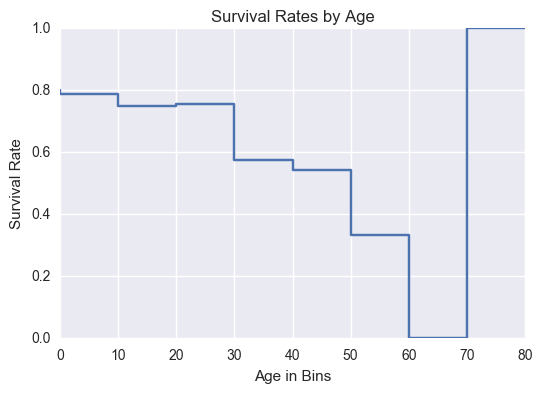

In [194]:
#group ages by bins
#website help: http://stackoverflow.com/questions/16947336/binning-a-dataframe-in-pandas-in-python

bins = np.linspace(0, 80, 9) 
#Returns num evenly spaced samples, calculated over the interval [start, stop].

print(bins)

titanic_noNaN = titanic_df.dropna()
age_groups_noNaN = titanic_noNaN.groupby(np.digitize(titanic_noNaN['Age'], bins))
#Return the indices of the bins to which each value in input array belongs.


print(age_groups_noNaN.mean())
print(age_groups_noNaN.apply(len))

#graph of survival rates
print(age_groups_noNaN.mean()['Survived'])
plt.plot(bins, age_groups_noNaN.mean()['Survived'], drawstyle='steps', fillstyle='left')
plt.title('Survival Rates by Age')
plt.xlabel('Age in Bins')
plt.ylabel('Survival Rate')


From the data, it appears that the rules of chivalry applied not only to women, but to children as well. Breaking the passengers into bins, we see that the older a passenger is, the less likely he/or she would survive. The only exception to this being the lone passenger over 80 years old who survived.

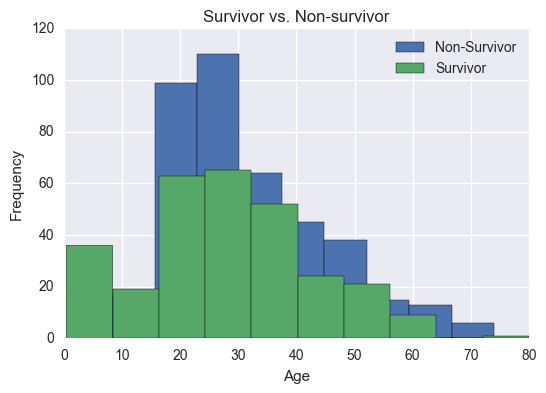

In [148]:
#change to rates

survival_age_list = titanic_df[titanic_df['Survived'] == 1]['Age'].dropna()
non_survival_age_list = titanic_df[titanic_df['Survived'] == 0]['Age'].dropna()

plt.hist(non_survival_age_list, label='Non-Survivor')
plt.hist(survival_age_list, label='Survivor')
plt.title('Survivor vs. Non-survivor')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

[[537, 38, 29, 1, 1, 2, 0], [123, 57, 19, 3, 3, 3, 1], [16, 7, 4, 1, 0, 0, 0], [2, 7, 7, 0, 0, 0, 0], [0, 9, 9, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 7, 0, 0, 0, 0]]


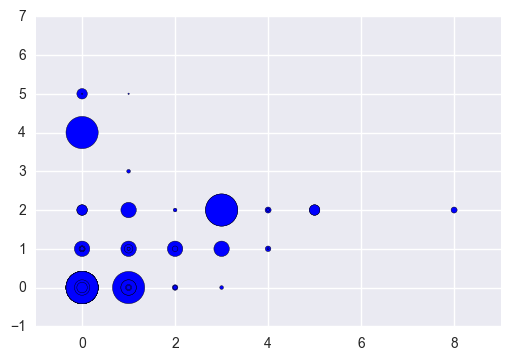

In [131]:
# bubble graph of parents, siblings

x=titanic_df['SibSp']
y=titanic_df['Parch']

freq = [[0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0]]



#max sib 8, max parch 6

for index, passenger in titanic_df.iterrows():
    freq[passenger['SibSp']][passenger['Parch']] += 1
    
print(freq)
    
plt.scatter(x,y, s=freq)

[[163, 25, 21, 1, 0, 0, 0], [64, 34, 12, 1, 0, 1, 0], [4, 6, 2, 1, 0, 0, 0], [2, 0, 2, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
[[374, 13, 8, 0, 1, 2, 0], [59, 23, 7, 2, 3, 2, 1], [12, 1, 2, 0, 0, 0, 0], [0, 7, 5, 0, 0, 0, 0], [0, 9, 6, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 7, 0, 0, 0, 0]]


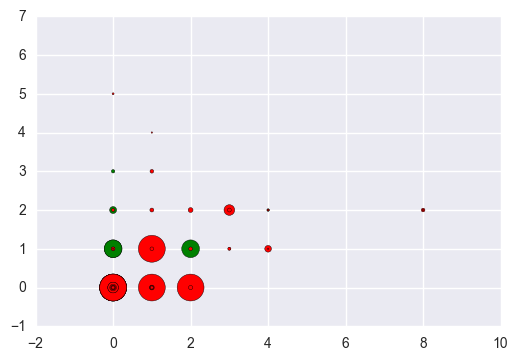

In [135]:
# bubble graph of parents, siblings based on survival

survivors = titanic_df[titanic_df['Survived'] == 1]
non_survivors = titanic_df[titanic_df['Survived'] == 0]

x_survival=survivors['SibSp']
y_survival=survivors['Parch']

freq_survivors = [[0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0]]

x_non_survival=non_survivors['SibSp']
y_non_survival=non_survivors['Parch']

freq_non_survivors = [[0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0]]



#max sib 8, max parch 6

for index, passenger in survivors.iterrows():
    freq_survivors[passenger['SibSp']][passenger['Parch']] += 1
    
for index, passenger in non_survivors.iterrows():
    freq_non_survivors[passenger['SibSp']][passenger['Parch']] += 1
    
print(freq_survivors)
print(freq_non_survivors)
    
plt.scatter(x_survival,y_survival, s=freq_survivors, c='Green')
plt.scatter(x_non_survival, y_non_survival, s=freq_non_survivors, c='Red')

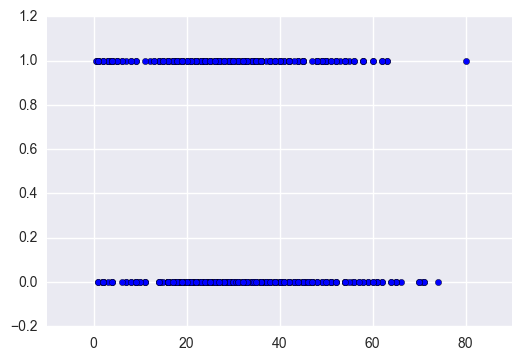

In [137]:
plt.scatter(titanic_df['Age'], titanic_df['Survived'])

In [196]:
#ticket class demographics

class_groups = titanic_df.groupby('Pclass')
print(class_groups.mean())

#find gender numbers

        PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550


In [13]:
#test stuff
print(survivor_groupings.mean().loc[0])
print(survivor_groupings.mean().iloc[0])


Survived         0.000000
PassengerId    447.016393
Pclass           2.531876
Age             30.626179
SibSp            0.553734
Parch            0.329690
Fare            22.117887
Name: 0, dtype: float64
Survived         0.000000
PassengerId    447.016393
Pclass           2.531876
Age             30.626179
SibSp            0.553734
Parch            0.329690
Fare            22.117887
Name: 0, dtype: float64


In [14]:
#make function returning survival rates for a specific group

def survivalRate(df):
    lived = 0
    died = 0
    for index, member in df.iterrows():
        if member['Survived'] == 1:
            lived += 1
        else:
            died += 1
    return lived / float(len(df))

print(survivalRate(titanic_df))

#gender rates

def gender_rates(df):
    females = 0
    males = 0
    for index, passenger in df.iterrows():
        if passenger['Sex'] == 'female':
            females += 1
        else:
            males += 1
    return females, males

print(gender_rates(titanic_df))

def average_age(df):
    return df['Age'].mean()

print(average_age(titanic_df))
            

0.383838383838
(314, 577)
29.6991176471


In [15]:
titanic_df.keys()
#survivor_groupings.iloc[0]

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [23]:
#Survival Rates by gender

gender_groups = titanic_df.groupby('Sex')
print(gender_groups.apply(gender_rates))
print(gender_groups.apply(survivalRate))
print(gender_groups.apply(average_age))

print(gender_groups['Survived'].mean())

Sex
female    (314, 0)
male      (0, 577)
dtype: object
Sex
female    0.742038
male      0.188908
dtype: float64
Sex
female    27.915709
male      30.726645
dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [17]:
#gender and Survival rates by class

ticket_groups = titanic_df.groupby('Pclass')
print(ticket_groups.apply(gender_rates))
print(ticket_groups.apply(survivalRate))
print(ticket_groups.apply(average_age))

Pclass
1     (94, 122)
2     (76, 108)
3    (144, 347)
dtype: object
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
dtype: float64
